In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I'm going to be using raw offensive data that can be found at: https://www.advancedsportsanalytics.com/nfl-raw-data

data = 'C:\\Users\\cdfwo\\Documents\\Nfl_data_2019-2023_season.csv'

data = pd.read_csv(data, low_memory=False)

In [3]:
# I'm going to need to create a calculated row for the winner of each game since the dataset only has scores

def winner(row):
    if row['vis_score'] > row['home_score']:
        val = row['vis_team']
    elif row['vis_score'] < row['home_score']:
        val = row['home_team']
    else:
        val = 'tie'
    return val

data['winner'] = data.apply(winner,axis=1)

In [4]:
# We need to check to see if current row player was winner.
data['won_game'] = data.winner == data.team

In [5]:
# Since this is all offensive raw data, I have data for every position on that side of the ball.
# I need to define just QB stats. I also want to only see QBs with more than 146 pass attempts. 
QBs = data[data.pos == 'QB'][['game_id','player','team',
                            'pass_cmp','pass_att','pass_yds',
                            'pass_td','pass_int','won_game']]

qb_stats = ['pass_cmp','pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked','player','team','pos','won_game']
groupby_qb_stats = ['player','pos']
qb_df = (data.loc[data.pos == "QB", qb_stats].groupby(groupby_qb_stats, as_index=False).sum())
qb_df['YPA']=np.round(qb_df.pass_yds / qb_df.pass_att,2)
qb_df = qb_df[qb_df['pass_att']> 146]

In [6]:

# I'm going to set the minimum total of wins to 14. More data means I need to increase my threshold
qb_wins = qb_df[(qb_df['won_game'] > 14)]

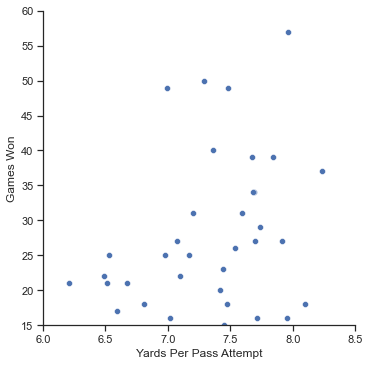

In [7]:
# It's time to make some charts.
# The first one I'm going to make is a relational plot using seaborn, just like in my last analysis.
# Except this time, I have enough data that I don't need to include the guys that only won a couple games. 
# I'm going to set my YPA to be more than 6 and less than 8.5 and my wins to be more than 15 and less than 60.

sns.set_theme(style="ticks")
#Using linear regression
for y in ['won_game']:
    g = sns.relplot(data=qb_wins, x='YPA', y=y)
    g.set_axis_labels("Yards Per Pass Attempt", "Games Won")
    plt.xlim(6, 8.5)
    plt.ylim(15,60)
    plt.show()

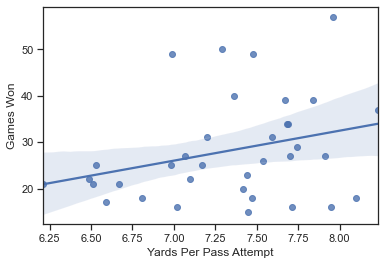

In [8]:
sns.set_theme(style="ticks")
for y in ['won_game']:
    g = sns.regplot(data=qb_wins, x='YPA', y=y)
    plt.xlabel("Yards Per Pass Attempt")
    plt.ylabel("Games Won")
    plt.show()

In [9]:
qb_df.sort_values(by=["won_game", "YPA"],
                 ascending = False,
                 )[["player","YPA", "won_game"]].head(25)

,player,YPA,won_game
96,Patrick Mahomes,7.96,57
61,Josh Allen,7.29,50
1,Aaron Rodgers,7.48,49
114,Tom Brady,6.99,49
76,Lamar Jackson,7.36,40
104,Ryan Tannehill,7.84,39
71,Kirk Cousins,7.67,39
56,Jimmy Garoppolo,8.23,37
100,Russell Wilson,7.69,34
111,Taysom Hill,7.68,34


In [10]:
# Now the top 25 in YPA.

qb_df.sort_values(by=["YPA", "won_game"],
                 ascending = False,
                 )[["player","YPA", "won_game"]].head(25)

,player,YPA,won_game
56,Jimmy Garoppolo,8.23,37
34,Deshaun Watson,8.10,18
16,Brock Purdy,8.08,8
96,Patrick Mahomes,7.96,57
52,Jameis Winston,7.95,16
87,Matthew Stafford,7.91,27
104,Ryan Tannehill,7.84,39
27,Dak Prescott,7.74,29
97,Philip Rivers,7.71,16
57,Joe Burrow,7.70,27


In [11]:
# Only 13 guys from the top 25 in wins appear on this list. 
# A little added intersting context as a football fan: Everyone on this list had a decent amount of hype around them when 
# they were playing, except for Eason and Howell, ironically, who are at or near the top. 